In [43]:
#we load the libraries 
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(quanteda)
library(lubridate)

In [2]:
#we read the dataframe created before with all the articles, after they have been translated
articles <- read_csv('cleaned_articles_2016_2024.csv')
head(articles)

Rows: 2532 Columns: 7
── Column specification ──────────────────────────────────────────────────
Delimiter: ","
chr  (3): article_url, article_text, cleaned_text
dbl  (2): num_comments, year
dttm (2): article_date_created, article_date_updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


article_url                                                                                            
1 https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/
2 https://www.thejournal.ie/rishi-sunak-northern-ireland-protocol-deal-imminent-5997518-Feb2023/         
3 https://www.thejournal.ie/migration-uk-eu-after-brexit-5561000-Oct2021/                                
4 https://www.thejournal.ie/irish-exports-highest-level-ever-5683731-Feb2022/                            
5 https://www.thejournal.ie/uk-bill-visa-non-eu-citizens-northern-ireland-border-5625136-Dec2021/        
6 https://www.thejournal.ie/no-extension-brexit-residency-scheme-uk-5474654-Jun2021/                     
  article_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [3]:
comments <- read_csv('cleaned_comments_2016_2024.csv')
head(comments)

Rows: 80729 Columns: 4
── Column specification ──────────────────────────────────────────────────
Delimiter: ","
chr  (3): article_url, comment_text, cleaned_comment
dttm (1): comment_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


article_url,comment_text,comment_date,cleaned_comment
<chr>,<chr>,<dttm>,<chr>
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,"An early warning system implies passivity and acquiescence. Better we should have a veto, since it is our (shared) island after all.",2021-02-09 18:53:00,"an early warning system implies passivity and acquiescence. better we should have a veto, since it is our (shared) island after all."
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Fachtna Roe: At the very least we should be consulted before making any decision.,2021-02-09 19:16:00,at the very least we should be consulted before making any decision.
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,I hate to admit it but for the first time ever I am beginning to waiver badly on the EU. Not only should they not have tried to invoke it without telling Ireland. We should have the power of veto on such a decision. Maybe the UK was right all along,2021-02-09 19:52:00,i hate to admit it but for the first time ever i am beginning to waiver badly on the eu. not only should they not have tried to invoke it without telling ireland. we should have the power of veto on such a decision. maybe the uk was right all along
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Mr Kayfabe: That some people on the remain side in the UK are beginning to think so too demonstrates what a huge mistake was made.,2021-02-09 20:11:00,that some people on the remain side in the uk are beginning to think so too demonstrates what a huge mistake was made.
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Mr Kayfabe: the EU26 stuck with us throughout the 4 years leading up to brexit. It appears a couple of lawyers under pressure with the AstraZeneca affair got a bit excited and made a bad call. Barnier was the first to tackle von der Leyen. She has made a few mistakes now. The future doesn’t look good for her.,2021-02-09 21:04:00,the eu26 stuck with us throughout the 4 years leading up to brexit. it appears a couple of lawyers under pressure with the astrazeneca affair got a bit excited and made a bad call. barnier was the first to tackle von der leyen. she has made a few mistakes now. the future doesn’t look good for her.
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,"The should be no seeking anything. They should release a statement saying that they understand a mistake was made; but that without consultation in future, we’re not on board. End of story.",2021-02-09 19:15:00,"the should be no seeking anything. they should release a statement saying that they understand a mistake was made; but that without consultation in future, we’re not on board. end of story."


In [4]:
data("data_dictionary_LSD2015", package = "quanteda")


In [5]:
#before applying the dictionary we first need to tokenise the text:

articles_toks <- quanteda::tokens(
  articles$cleaned_text,
  remove_numbers = TRUE,
  remove_symbols = TRUE
)

In [6]:
#we apply Lexicoder Sentiment Dictionary to a document feature matrix
articles_sent <- quanteda::dfm(
  quanteda::tokens_lookup(articles_toks, dictionary = data_dictionary_LSD2015)
)
articles_sent

Document-feature matrix of: 2,532 documents, 4 features (42.91% sparse) and 0 docvars.
       features
docs    negative positive neg_positive neg_negative
  text1       28       25            0            0
  text2       42       18            0            0
  text3       33       42            0            0
  text4       10       15            0            1
  text5       15       16            0            0
  text6        9       33            0            0
[ reached max_ndoc ... 2,526 more documents ]

In [7]:
#we extract negative counts
negative_counts <- convert(articles_sent, to = "data.frame")$negative

In [8]:
#and make sure the article date is in Date format
articles$article_date_created <- as.Date(articles$article_date_created)

#then create a "month" column in YYYY-MM format
articles$month <- format(articles$article_date_created, "%Y-%m")

#we need to count number of articles per month
monthly_article_counts <- articles %>%
  group_by(month) %>%
  summarise(article_count = n()) %>%
  arrange(month)

print(monthly_article_counts)


# A tibble: 98 × 2
   month   article_count
   <chr>           <int>
 1 2016-01             1
 2 2016-02             6
 3 2016-03             3
 4 2016-04            12
 5 2016-05             8
 6 2016-06            69
 7 2016-07            50
 8 2016-08            18
 9 2016-09            10
10 2016-10            30
# ℹ 88 more rows


In [10]:
#then we need to see the negativity percentage for each article, based on the article length
articles$article_length <- sapply(strsplit(articles$cleaned_text, "\\s+"), length)
articles <- articles %>%
  mutate(negativity_percent = (negativity / article_length)*100)

In [12]:
write.csv(articles, "articles_with_lexicoder_sentiment.csv", row.names = FALSE)


## Visualisation/Interpretation of the results ##

In [24]:
#let's look at some summary statistics of the negativity in the articles
summary_stats <- summary(articles$negativity_percent)
sd_negativity <- sd(articles$negativity_percent, na.rm = TRUE)

print(summary_stats)
sd_negativity

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.249   3.162   3.280   4.167  13.415 


[1] 1.483478

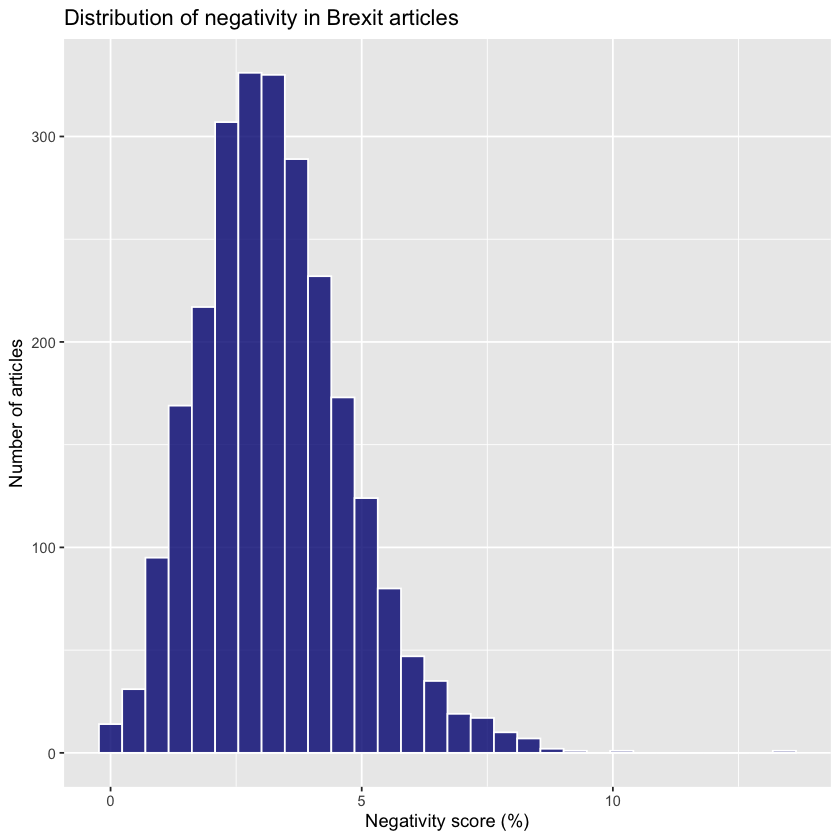

In [27]:
#then we plot the distribution of negativity in brexit articles 
ggplot(articles, aes(x = negativity_percent)) +
  geom_histogram(fill = "navyblue", color = "white", bins = 30, alpha = 0.8) +
  labs(
    title = "Distribution of negativity in Brexit articles",
    x = "Negativity score (%)",
    y = "Number of articles"
  ) 

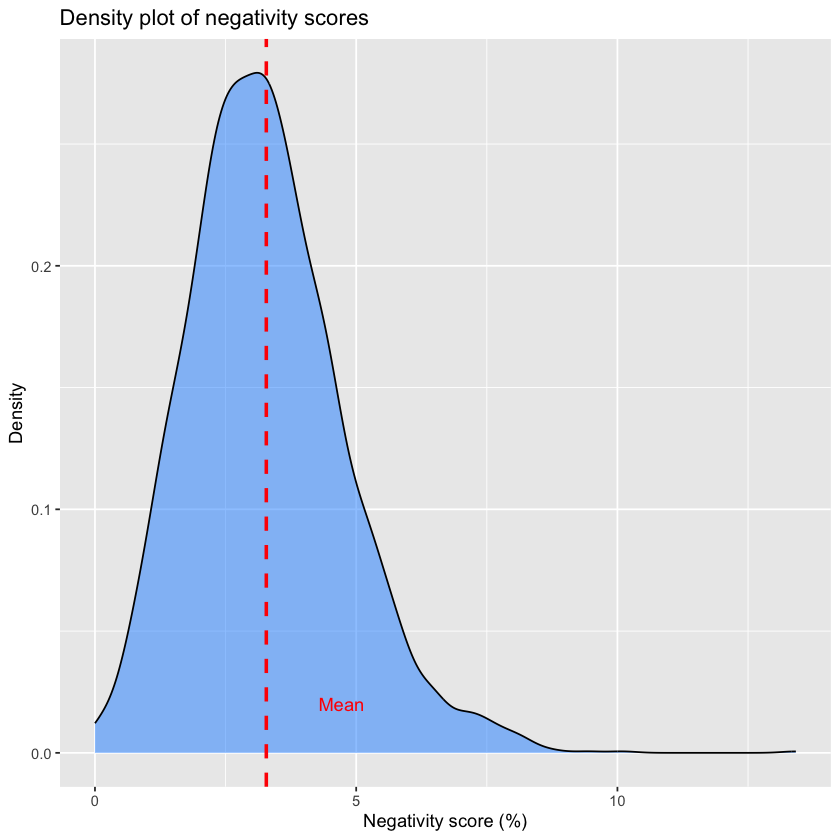

In [30]:
#and the density plot of negativity scores
ggplot(articles, aes(x = negativity_percent)) +
  geom_density(fill = "dodgerblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(negativity_percent)),
             color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Density plot of negativity scores",
    x = "Negativity score (%)",
    y = "Density"
  ) +
  annotate("text", x = mean(articles$negativity_percent) + 1,
           y = 0.02, label = "Mean", color = "red", hjust = 0) 


## For the comments ##

In [16]:
#before applying the dictionary we first need to tokenise the text:

comments_toks <- quanteda::tokens(
  comments$cleaned_comment,
  remove_numbers = TRUE,
  remove_symbols = TRUE
)

Warning message:
“NA is replaced by empty string”


In [17]:
#we apply Lexicoder Sentiment Dictionary to a document feature matrix
comments_sent <- quanteda::dfm(
  quanteda::tokens_lookup(comments_toks, dictionary = data_dictionary_LSD2015)
)
comments_sent

Document-feature matrix of: 80,729 documents, 4 features (70.87% sparse) and 0 docvars.
       features
docs    negative positive neg_positive neg_negative
  text1        1        2            0            0
  text2        0        0            0            0
  text3        3        2            0            0
  text4        2        0            0            0
  text5        2        2            0            0
  text6        1        1            0            0
[ reached max_ndoc ... 80,723 more documents ]

In [18]:
comments$negativity <- convert(comments_sent, to = "data.frame")$negative


In [19]:
comments$comment_length <- sapply(strsplit(comments$cleaned_comment, "\\s+"), length)


In [20]:
#now we can get a negativity score based on the number of words in the article (article_length)
comments <- comments %>%
  mutate(negativity_percent = (negativity / comment_length)*100)


In [21]:
head(comments)

article_url,comment_text,comment_date,cleaned_comment,negativity,comment_length,negativity_percent
<chr>,<chr>,<dttm>,<chr>,<dbl>,<int>,<dbl>
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,"An early warning system implies passivity and acquiescence. Better we should have a veto, since it is our (shared) island after all.",2021-02-09 18:53:00,"an early warning system implies passivity and acquiescence. better we should have a veto, since it is our (shared) island after all.",1,22,4.545455
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Fachtna Roe: At the very least we should be consulted before making any decision.,2021-02-09 19:16:00,at the very least we should be consulted before making any decision.,0,12,0.000000
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,I hate to admit it but for the first time ever I am beginning to waiver badly on the EU. Not only should they not have tried to invoke it without telling Ireland. We should have the power of veto on such a decision. Maybe the UK was right all along,2021-02-09 19:52:00,i hate to admit it but for the first time ever i am beginning to waiver badly on the eu. not only should they not have tried to invoke it without telling ireland. we should have the power of veto on such a decision. maybe the uk was right all along,3,51,5.882353
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Mr Kayfabe: That some people on the remain side in the UK are beginning to think so too demonstrates what a huge mistake was made.,2021-02-09 20:11:00,that some people on the remain side in the uk are beginning to think so too demonstrates what a huge mistake was made.,2,23,8.695652
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,@Mr Kayfabe: the EU26 stuck with us throughout the 4 years leading up to brexit. It appears a couple of lawyers under pressure with the AstraZeneca affair got a bit excited and made a bad call. Barnier was the first to tackle von der Leyen. She has made a few mistakes now. The future doesn’t look good for her.,2021-02-09 21:04:00,the eu26 stuck with us throughout the 4 years leading up to brexit. it appears a couple of lawyers under pressure with the astrazeneca affair got a bit excited and made a bad call. barnier was the first to tackle von der leyen. she has made a few mistakes now. the future doesn’t look good for her.,2,57,3.508772
https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/,"The should be no seeking anything. They should release a statement saying that they understand a mistake was made; but that without consultation in future, we’re not on board. End of story.",2021-02-09 19:15:00,"the should be no seeking anything. they should release a statement saying that they understand a mistake was made; but that without consultation in future, we’re not on board. end of story.",1,32,3.125000


In [23]:
count(comments)

n
<int>
80729


In [22]:
write.csv(comments, "comments_with_lexicoder_sentiment.csv", row.names = FALSE)
